In [1]:
#import Libraries
using Zygote
using LinearAlgebra
using Plots

In [246]:
#basic model of Linear
mutable struct Linear
    W
    b
end

(l::Linear)(x) = l.W * x .+ l.b

(l::Linear)(x,y) = norm(l.W * x .+ l.b .- y, 2)

In [247]:
#generate fake data points
weights_gt = [1.2, 4.8]'
bias_gt = 2.4
X = randn(length(weights_gt), 10000)
Y = weights_gt * X .+ bias_gt
X .+= 5.0.*randn(size(X))

2×10000 Array{Float64,2}:
 3.69567   0.315653  -4.55397  3.22621  …   1.72541   1.65481  -3.30199
 2.6444   -0.408591   1.31034  2.49638     -1.57991  -1.96191   3.83089

In [248]:
model = Linear(rand(1,2), rand(1))

Linear([0.555446 0.535235], [0.484601])

In [262]:
model.W = [1.0 1.0]
model.b = [1.0]

1-element Array{Float64,1}:
 1.0

In [263]:
function sgd_update!(model::Linear, dmodel, η = 0.004)
    model.W .-= η .* dmodel.W
    model.b -= η * dmodel.b
end

sgd_update! (generic function with 2 methods)

In [264]:
losses_10 = []
W_log = []
b_log = []
for idx in 1:50
    i = (idx%1000)*10
    losses_10 = append!(losses_10,[model(X,Y)])
    grads = gradient(model -> model(X[:,1+i:10+i],Y[:,1+i:10+i]),model)[1][]
    W_log = append!(W_log,model.W[1])
    b_log = append!(b_log,model.b)
    sgd_update!(model, grads)
end

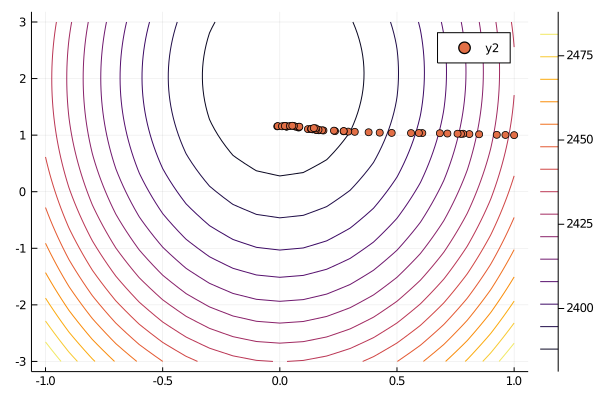

In [265]:
x =-1:0.1:1
y =-3:0.1:3
f(w1,b1) = begin

    model.W = [w1,4.8]
    model.W = reshape(model.W, 1, :)
    model.b = [b1]
    model(X,Y)

    end
X1 = repeat(reshape(x, 1, :), length(y), 1)
Y1 = repeat(y, 1, length(x))
Z = map(f, X1, Y1)
p2 = contour(x, y, Z)
p1 = scatter!(W_log,b_log)
plot(p2)

In [266]:
model.W = [1.0 1.0]
model.b = [1.0]

1-element Array{Float64,1}:
 1.0

In [267]:
losses_100 = []
W_log = []
b_log = []
for idx in 1:50
    i  = (idx%100)*100
    losses_100 = append!(losses_100,[model(X,Y)])
    grads = gradient(model -> model(X[:,1+i:100+i],Y[:,1+i:100+i]),model)[1][]
    W_log = append!(W_log,model.W[1])
    b_log = append!(b_log,model.b[1])
    sgd_update!(model, grads)
end

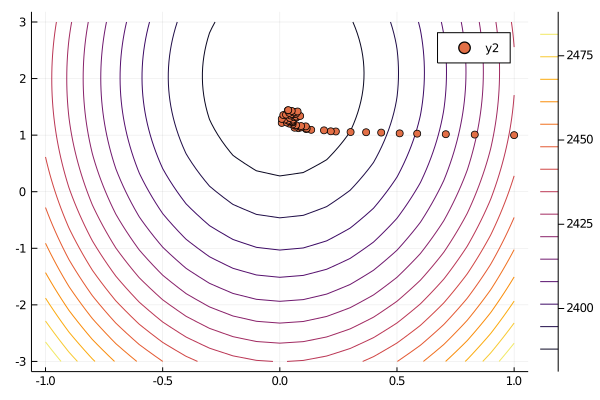

In [268]:
x =-1:0.1:1
y =-3:0.1:3
f(w1,b1) = begin

    model.W = [w1,4.8]
    model.W = reshape(model.W, 1, :)
    model.b = [b1]
    model(X,Y)

    end
X1 = repeat(reshape(x, 1, :), length(y), 1)
Y1 = repeat(y, 1, length(x))
Z = map(f, X1, Y1)
p2 = contour(x, y, Z)
p1 = scatter!(W_log,b_log)
plot(p2)

In [269]:
model.W = [1.0 1.0]
model.b = [1.0]

1-element Array{Float64,1}:
 1.0

In [270]:
losses_1000 = []
W_log = []
b_log = []
for idx in 1:50
    i = (idx%10)*1000
    losses_1000 = append!(losses_1000,[model(X,Y)])
    grads = gradient(model -> model(X,Y),model)[1][]
    W_log = append!(W_log,model.W[1])
    b_log = append!(b_log,model.b[1])
    sgd_update!(model, grads)
end

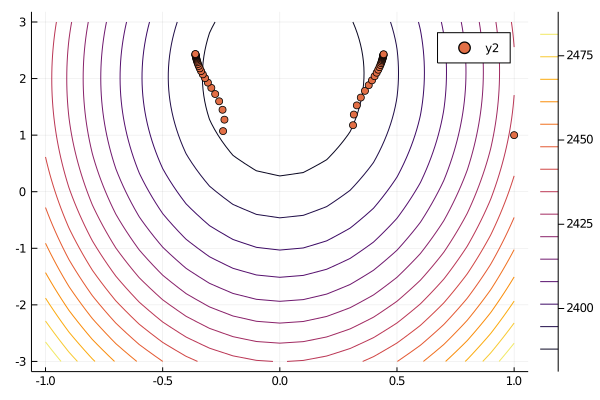

In [271]:
x =-1:0.1:1
y =-3:0.1:3
f(w1,b1) = begin

    model.W = [w1,4.8]
    model.W = reshape(model.W, 1, :)
    model.b = [b1]
    model(X,Y)

    end
X1 = repeat(reshape(x, 1, :), length(y), 1)
Y1 = repeat(y, 1, length(x))
Z = map(f, X1, Y1)
p2 = contour(x, y, Z)
p1 = scatter!(W_log,b_log)
plot(p2)

In [272]:
model.W = [1.0 1.0]
model.b = [1.0]

1-element Array{Float64,1}:
 1.0

In [273]:
losses_stochastic = []
W_log = []
b_log = []
for idx in 1:50
    i = rand(1:size(X,2))
    losses_stochastic = append!(losses_stochastic,[model(X,Y)])
    grads = gradient(model -> model(X[:,i],Y[:,i]),model)[1][]
    W_log = append!(W_log,model.W[1])
    b_log = append!(b_log,model.b[1])
    sgd_update!(model, grads)
end

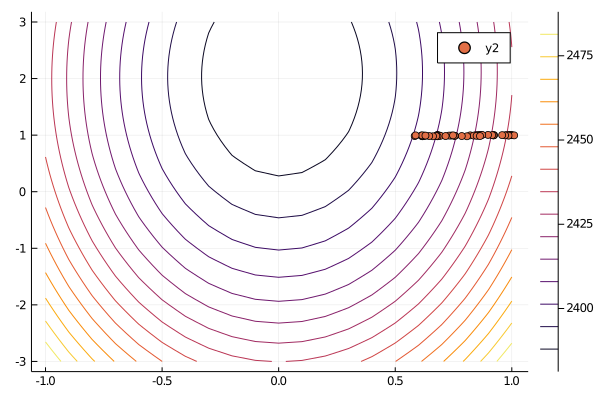

In [274]:
x =-1:0.1:1
y =-3:0.1:3
f(w1,b1) = begin

    model.W = [w1,4.8]
    model.W = reshape(model.W, 1, :)
    model.b = [b1]
    model(X,Y)

    end
X1 = repeat(reshape(x, 1, :), length(y), 1)
Y1 = repeat(y, 1, length(x))
Z = map(f, X1, Y1)
p2 = contour(x, y, Z)
p1 = scatter!(W_log,b_log)
plot(p2)

In [275]:
@info("Ground truth weights: $(weights_gt)")
@info("Learned weights: $(round.(model.W; digits=3))")
@info("Ground truth bias: $(bias_gt)")
@info("Learned bias: $(round.(model.b; digits=3))")

┌ Info: Ground truth weights: [1.2 4.8]
└ @ Main In[275]:1
┌ Info: Learned weights: [1.0 4.8]
└ @ Main In[275]:2
┌ Info: Ground truth bias: 2.4
└ @ Main In[275]:3
┌ Info: Learned bias: [3.0]
└ @ Main In[275]:4


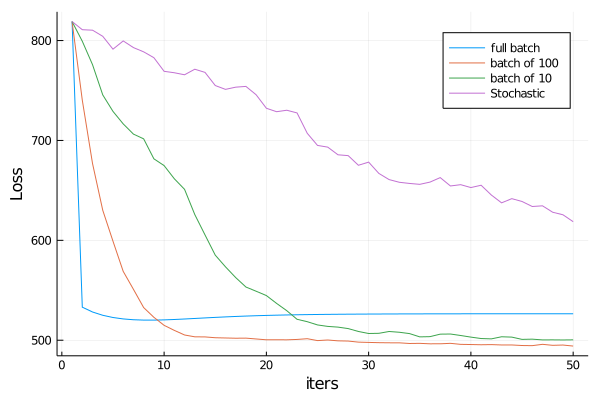

In [276]:
plot([losses_1000,losses_100,losses_10,losses_stochastic],xlabel = "iters",ylabel="Loss",label = ["full batch" "batch of 100" "batch of 10" "Stochastic"])